In [1]:
import os
import vtk
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
from sympy import per
from utils.append_df_to_excel import append_df_to_excel
from splot.esda import plot_moran
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from scipy.spatial.distance import pdist, squareform
from libpysal.weights import DistanceBand
from esda.moran import Moran
from pysal.lib import weights
from splot.esda import moran_scatterplot
from pymskt.mesh import Mesh, BoneMesh
from vtk.util.numpy_support import numpy_to_vtk, vtk_to_numpy
from pymskt.mesh.meshTools import smooth_scalars_from_second_mesh_onto_base, transfer_mesh_scalars_get_weighted_average_n_closest

/dataNAS/people/anoopai/miniconda3/envs/knee_pipeline/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.4-CAPI-1.17.4) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
visits = ['VISIT-2']
knees = ['aclr']
sig_values = [0.05]
distance_bands = [0.05]
weight_decay = [-1.0]
permutation= [999]
analysis_all = pd.DataFrame()

dir_path = '/dataNAS/people/anoopai/DESS_ACL_study'
code_dir_path = '/dataNAS/people/anoopai/KneePipeline/'
data_path = os.path.join(dir_path, 'data')
log_path = '/dataNAS/people/anoopai/KneePipeline/logs'
log_file_path = os.path.join(log_path, f'pipeline_DESS_errors.txt')
mean_path = os.path.join(code_dir_path, 'mean_data')
save_path = os.path.join(mean_path, f't2filt_and_thickness_change')


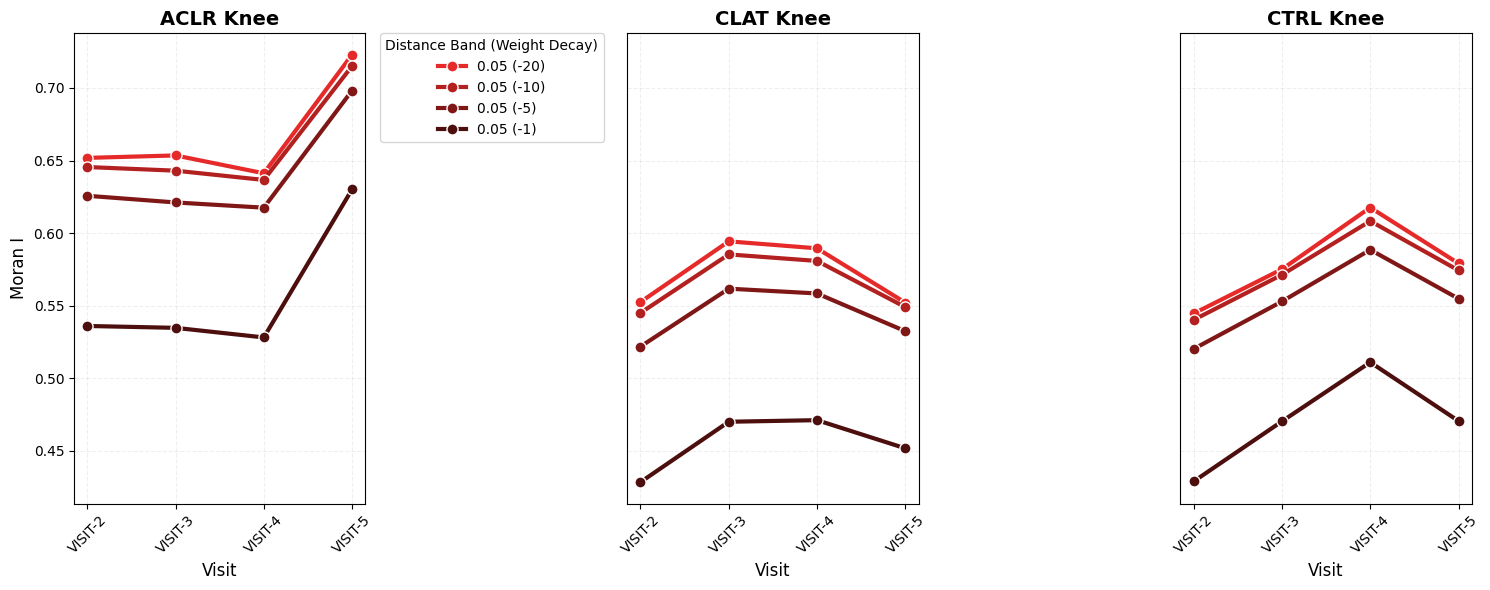

In [18]:
from cProfile import label
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Assuming 'data' is your DataFrame
df = data.copy()

# Prepare data
df['visit'] = pd.Categorical(df['visit'], categories=[f'VISIT-{i}' for i in range(2,6)], ordered=True)
distance_bands = df['distance_band'].unique()
knees = df['knee'].unique()

# Create color mapping with magenta hues
colours = ['#7f1717', '#08467f', '#346202']  # Your custom base colors
color_dict = {}

# Convert hex colors to HSV and create lighter variants
for color_idx, db in enumerate(distance_bands):
    base_hex = colours[color_idx]
    
    # Convert hex to RGB then to HSV
    base_rgb = mcolors.hex2color(base_hex)
    base_hsv = mcolors.rgb_to_hsv(base_rgb)
    
    wds = sorted(df[df['distance_band'] == db]['weight_decay'].unique(), reverse=True)
    
    # Create lightness variants while keeping hue and saturation
    for i, value in enumerate(np.linspace(0.3, 0.9, len(wds))):
        # Keep original hue and saturation, adjust value (lightness)
        modified_hsv = (base_hsv[0], base_hsv[1], value)
        rgb_color = mcolors.hsv_to_rgb(modified_hsv)
        color_dict[(db, wds[i])] = rgb_color

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# Create a list to collect all legend entries
legend_elements = []

for i, knee in enumerate(knees):
    ax = axes[i]
    subset = df[df['knee'] == knee]
    
    # Get numeric values for visits
    visit_codes = subset['visit'].cat.codes.values
    x_ticks = np.arange(len(df['visit'].cat.categories))
    
    for (db, wd), group in subset.groupby(['distance_band', 'weight_decay']):
        group = group.sort_values('visit')
        x_vals = group['visit'].cat.codes
        y_vals = group['moran_I']
        
        # Plot main line with markers
        line = ax.plot(x_vals, y_vals,
                color=color_dict[(db, wd)],
                marker='o',
                markersize=8,
                linewidth=3,
                markeredgecolor='white',
                markeredgewidth=1,
                zorder=2,
                label=f'{db} ({wd})')
    

        # Adjust layout to make space for legend
        plt.tight_layout(rect=[0, 0.1, 1, 1])  # [left, bottom, right, top]

    # Formatting
    ax.set_title(f'{knee.upper()} Knee', fontsize=14, weight='bold')
    ax.set_xlabel('Visit', fontsize=12)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(df['visit'].cat.categories, rotation=45)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    if i == 0:
        ax.set_ylabel('Moran I', fontsize=12)
        ax.legend(bbox_to_anchor=(1.05, 1), 
                 title='Distance Band (Weight Decay)',
                 borderaxespad=0.)
    else:
        ax.tick_params(axis='y', which='both', length=0)

plt.tight_layout()
# plt.savefig('enhanced_moranI_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from cProfile import label
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Assuming 'data' is your DataFrame
df = data.copy()

# Prepare data
df['visit'] = pd.Categorical(df['visit'], categories=[f'VISIT-{i}' for i in range(2,6)], ordered=True)
distance_bands = df['distance_band'].unique()
knees = df['knee'].unique()

# Create color mapping with magenta hues
colours = ['#7f1717', '#08467f', '#346202']  # Your custom base colors
color_dict = {}

# Convert hex colors to HSV and create lighter variants
for color_idx, db in enumerate(distance_bands):
    base_hex = colours[color_idx]
    
    # Convert hex to RGB then to HSV
    base_rgb = mcolors.hex2color(base_hex)
    base_hsv = mcolors.rgb_to_hsv(base_rgb)
    
    wds = sorted(df[df['distance_band'] == db]['weight_decay'].unique(), reverse=True)
    
    # Create lightness variants while keeping hue and saturation
    for i, value in enumerate(np.linspace(0.3, 0.9, len(wds))):
        # Keep original hue and saturation, adjust value (lightness)
        modified_hsv = (base_hsv[0], base_hsv[1], value)
        rgb_color = mcolors.hsv_to_rgb(modified_hsv)
        color_dict[(db, wds[i])] = rgb_color

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# Create a list to collect all legend entries
legend_elements = []

for i, knee in enumerate(knees):
    ax = axes[i]
    subset = df[df['knee'] == knee]
    
    # Get numeric values for visits
    visit_codes = subset['visit'].cat.codes.values
    x_ticks = np.arange(len(df['visit'].cat.categories))
    
    for (db, wd), group in subset.groupby(['distance_band', 'weight_decay']):
        group = group.sort_values('visit')
        x_vals = group['visit'].cat.codes
        y_vals = group['moran_I']
        
        # Plot main line with markers
        line = ax.plot(x_vals, y_vals,
                color=color_dict[(db, wd)],
                marker='o',
                markersize=8,
                linewidth=3,
                markeredgecolor='white',
                markeredgewidth=1,
                zorder=2,
                label=f'{db} ({wd})')
    

        # Adjust layout to make space for legend
        plt.tight_layout(rect=[0, 0.1, 1, 1])  # [left, bottom, right, top]

    # Formatting
    ax.set_title(f'{knee.upper()} Knee', fontsize=14, weight='bold')
    ax.set_xlabel('Visit', fontsize=12)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(df['visit'].cat.categories, rotation=45)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    if i == 0:
        ax.set_ylabel('Moran I', fontsize=12)
        ax.legend(bbox_to_anchor=(1.05, 1), 
                 title='Distance Band (Weight Decay)',
                 borderaxespad=0.)
    else:
        ax.tick_params(axis='y', which='both', length=0)

plt.tight_layout()
# plt.savefig('enhanced_moranI_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from cProfile import label
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Assuming 'data' is your DataFrame
df = data.copy()

# Prepare data
df['visit'] = pd.Categorical(df['visit'], categories=[f'VISIT-{i}' for i in range(2,6)], ordered=True)
distance_bands = df['distance_band'].unique()
knees = df['knee'].unique()

# Create color mapping with magenta hues
colours = ['#7f1717', '#08467f', '#346202']  # Your custom base colors
color_dict = {}

# Convert hex colors to HSV and create lighter variants
for color_idx, db in enumerate(distance_bands):
    base_hex = colours[color_idx]
    
    # Convert hex to RGB then to HSV
    base_rgb = mcolors.hex2color(base_hex)
    base_hsv = mcolors.rgb_to_hsv(base_rgb)
    
    wds = sorted(df[df['distance_band'] == db]['weight_decay'].unique(), reverse=True)
    
    # Create lightness variants while keeping hue and saturation
    for i, value in enumerate(np.linspace(0.3, 0.9, len(wds))):
        # Keep original hue and saturation, adjust value (lightness)
        modified_hsv = (base_hsv[0], base_hsv[1], value)
        rgb_color = mcolors.hsv_to_rgb(modified_hsv)
        color_dict[(db, wds[i])] = rgb_color

fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)

# Create a list to collect all legend entries
legend_elements = []

for i, knee in enumerate(knees):
    ax = axes[i]
    subset = df[df['knee'] == knee]
    
    # Get numeric values for visits
    visit_codes = subset['visit'].cat.codes.values
    x_ticks = np.arange(len(df['visit'].cat.categories))
    
    for (db, wd), group in subset.groupby(['distance_band', 'weight_decay']):
        group = group.sort_values('visit')
        x_vals = group['visit'].cat.codes
        y_vals = group['moran_I']
        
        # Plot main line with markers
        line = ax.plot(x_vals, y_vals,
                color=color_dict[(db, wd)],
                marker='o',
                markersize=8,
                linewidth=3,
                markeredgecolor='white',
                markeredgewidth=1,
                zorder=2,
                label=f'{db} ({wd})')
    

        # Adjust layout to make space for legend
        plt.tight_layout(rect=[0, 0.1, 1, 1])  # [left, bottom, right, top]

    # Formatting
    ax.set_title(f'{knee.upper()} Knee', fontsize=14, weight='bold')
    ax.set_xlabel('Visit', fontsize=12)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(df['visit'].cat.categories, rotation=45)
    ax.grid(True, alpha=0.2, linestyle='--')
    
    if i == 0:
        ax.set_ylabel('Moran I', fontsize=12)
        ax.legend(bbox_to_anchor=(1.05, 1), 
                 title='Distance Band (Weight Decay)',
                 borderaxespad=0.)
    else:
        ax.tick_params(axis='y', which='both', length=0)

plt.tight_layout()
# plt.savefig('enhanced_moranI_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
from scipy.spatial.distance import pdist, squareform
import numpy as np

# All pairwise distances
dists = pdist(points)
print("Min:", np.min(dists))
print("Mean:", np.mean(dists))
print("Max:", np.max(dists))


In [ ]:
def estimate_distance_band(locations, target_neighbors=4):
    from scipy.spatial import distance_matrix
    dist_mat = distance_matrix(locations, locations)
    np.fill_diagonal(dist_mat, np.inf)
    sorted_dists = np.sort(dist_mat, axis=1)
    kth_dists = sorted_dists[:, target_neighbors - 1]
    return np.max(kth_dists)  # ensures every point has at least `target_neighbors`

# Example usage:
distance_band = estimate_distance_band(points, target_neighbors=8)

print(distance_band)
